# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Common Setup

In [2]:
np.random.seed(306)

In [3]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Data Loading and Splitting

In [4]:
# Fetching data
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# Train-test-split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

# train --> train + dev split (dev = development set)
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

# Linear Regression with Normal Equation

In [5]:
lin_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])


lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features, 
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score'] 
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

In [6]:
print(f"Mean absolute error of linear regression model on the train set:\n"
    f"{lin_reg_train_error.mean() :.3f} +/- {lin_reg_train_error.std() :.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
    f"{lin_reg_test_error.mean() :.3f} +/- {lin_reg_test_error.std() :.3f}")

Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002
Mean absolute error of linear regression model on the test set:
0.527 +/- 0.008


# Linear Regression with SGD

In [7]:
sgd_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('sgd_reg', SGDRegressor(
        max_iter=int(np.ceil(1e6 / com_train_features.shape[0])),
        early_stopping=True,
        eta0=1e-4,
        learning_rate='constant',
        tol=1e-5,
        validation_fraction=0.1,
        n_iter_no_change=5,
        average=10,
        random_state=42))
])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_estimator=True,
                                    return_train_score=True)

sgd_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_cv_results['test_score']

In [8]:
print(f"Mean absolute error of SGD regression model on the train set:\n"
    f"{sgd_train_error.mean() :.3f} +/- {sgd_train_error.std() :.3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n"
    f"{sgd_test_error.mean() :.3f} +/- {sgd_test_error.std() :.3f}")

Mean absolute error of SGD regression model on the train set:
0.534 +/- 0.013
Mean absolute error of SGD regression model on the test set:
0.530 +/- 0.010


# Polynomial Regression

In [9]:
poly_reg_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv=cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score=True,
                                     return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n"
    f"{poly_reg_train_error.mean() :.3f} +/- {poly_reg_train_error.std() :.3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n"
    f"{poly_reg_test_error.mean() :.3f} +/- {poly_reg_test_error.std() :.3f}")

Mean absolute error of SGD regression model on the train set:
0.461 +/- 0.003
Mean absolute error of SGD regression model on the test set:
0.485 +/- 0.030


### Interaction Only
- Now instead of using all polynomial features we will use **interaction only** features.

In [10]:
poly_reg_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv=cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score=True,
                                     return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n"
    f"{poly_reg_train_error.mean() :.3f} +/- {poly_reg_train_error.std() :.3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n"
    f"{poly_reg_test_error.mean() :.3f} +/- {poly_reg_test_error.std() :.3f}")

Mean absolute error of SGD regression model on the train set:
0.478 +/- 0.003
Mean absolute error of SGD regression model on the test set:
0.497 +/- 0.024


Let's find out which degree is better for suited for the regression problem.

Text(0, 0.5, 'mean absolute error')

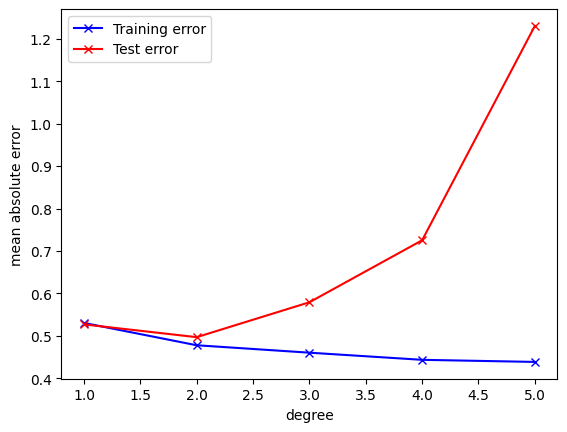

In [11]:
degree = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(poly_reg_pipeline,
                                             com_train_features,
                                             com_train_labels,
                                             param_name='poly__degree',
                                             param_range=degree,
                                             cv=cv,
                                             scoring='neg_mean_absolute_error',
                                             n_jobs=2)

train_errors, test_errors = -train_scores, -test_scores

plt.plot(degree, train_errors.mean(axis=1), 'b-x', label='Training error')
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label='Test error')
plt.legend()

plt.xlabel('degree')
plt.ylabel('mean absolute error')

# Ridge Regression
- The polynomial models have a tendency to over fit by selecting higher degree.
- We will use Ridge regression which penalizes for excessive model complexity.

In [51]:
ridge_reg_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('ridge', Ridge(alpha=0.5)),
])

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring='neg_mean_absolute_error',
                                      return_estimator=True,
                                      return_train_score=True)

ridge_reg_train_error = -ridge_reg_cv_results['train_score']
ridge_reg_test_error = -ridge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model (alpha=0.5) on the train set:\n"
f"{ridge_reg_train_error.mean() :.3f} +/- {ridge_reg_train_error.std() : .3f}")
print(f"Mean absolute error of ridge regression model (alpha=0.5) on the test set:\n"
f"{ridge_reg_test_error.mean() :.3f} +/- {ridge_reg_test_error.std() :.3f}")

Mean absolute error of ridge regression model (alpha=0.5) on the train set:
0.481 +/-  0.003
Mean absolute error of ridge regression model (alpha=0.5) on the test set:
0.487 +/- 0.006


# HPT for Ridge Regularization Rate

In [19]:
np.logspace(-4, 0,  num=5)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [20]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('ridge_CV', RidgeCV(alphas=alpha_list, cv=cv, scoring='neg_mean_absolute_error')),
])

ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

print ("The score with the best alpha is:",
    f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print ("The error with the best alpha is:",
    f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with the best alpha is: -0.473
The error with the best alpha is: 0.473


In [21]:
print ("The best value for alpha:", ridge_reg_cv_results[-1].alpha_)

The best value for alpha: 0.007847599703514606


# Ridge HPT using `GridSearchCV`

In [28]:
ridge_grid_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('feature_scaling', StandardScaler()),
    ('ridge', Ridge()),
])

param_grid = {
    'poly__degree' : (1, 2, 3),
    'ridge__alpha' : np.logspace(-4, 0, num=20)
}
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid=param_grid,
                                 scoring='neg_mean_absolute_error',
                                 cv=cv,
                                 n_jobs=2,
                                 return_train_score=True)
ridge_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [29]:
ridge_grid_search.best_params_

{'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}

`ridge_grid_search.best_index_` gives us the index of the best parameter in the list.

In [30]:
mean_train_error = -1 * ridge_grid_search.cv_results_['mean_train_score' ] [ridge_grid_search.best_index_]
mean_test_error = -1 * ridge_grid_search.cv_results_['mean_test_score' ] [ridge_grid_search.best_index_]
std_train_error = ridge_grid_search.cv_results_['std_train_score' ] [ridge_grid_search.best_index_]
std_test_error = ridge_grid_search.cv_results_['std_train_score' ] [ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
f"{mean_train_error :.3f} +/- {std_train_error :.3f}")
print(f"Mean absolute error of polynomial ridge regression model on the test set:\n"
f"{mean_test_error :.3f} +/- {std_test_error :.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463 +/- 0.004
Mean absolute error of polynomial ridge regression model on the test set:
0.474 +/- 0.004


# Lasso Regression

### Baseline Model with Fixed Learning Rate

In [31]:
lasso_reg_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("feature_scaling", StandardScaler()),
    ("lasso", Lasso(alpha=0.01))
])

lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,                              
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring="neg_mean_absolute_error",
                                      return_train_score=True,
                                      return_estimator=True)

lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1 * lasso_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
f"{lasso_reg_train_error.mean() :.3f} +/- {ridge_reg_train_error.std(): .3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
f"{lasso_reg_test_error.mean() :.3f} +/- {ridge_reg_test_error.std() :.3f}")

c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 1.654e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+01, tolerance: 1.669e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Mean absolute error of linear regression model on the train set:
0.529 +/-  0.003
Mean absolute error of linear regression model on the test set:
0.528 +/- 0.006


c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.658e+00
  model = cd_fast.enet_coordinate_descent(


# HPT for Lasso Regularization Rate
#### 1. With cross validation
#### 2. With `GridSearchCV`
*Similar to Ridge Regression Code*

# SGD: Regularization and HPT

In [32]:
poly_sgd_pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("feature_scaling", StandardScaler()),
    ("sgd_reg", SGDRegressor(
        penalty='elasticnet',
        random_state=42))
])

poly_sgd_cv_results = cross_validate(poly_sgd_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv=cv,
                                     scoring="neg_mean_absolute_error",
                                     return_train_score=True,
                                     return_estimator=True)

poly_sgd_train_error = -1 * poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1 * poly_sgd_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
f"{poly_sgd_train_error.mean() :.3f} +/- {poly_sgd_train_error.std(): .3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
f"{poly_sgd_test_error.mean() :.3f} +/- {poly_sgd_test_error.std(): .3f}")

Mean absolute error of linear regression model on the train set:
10824283052.546 +/-  4423288211.832
Mean absolute error of linear regression model on the test set:
10946788540.250 +/-  5396536227.703


# HPT using `RandomizedSearchCV`

In [33]:
class uniform_int:
    """Integer valued version of the uniform distribution"""
    def __int__(self, a, b):
        self.distribution = uniform(a, b)
    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self.distribution.rvs(*args, **kwargs).astype(int)

In [36]:
param_distributions = {
    'poly__degree': [1, 2, 3],
    'sgd_reg__learning_rate': ['constant', 'adaptive', 'invscaling'],
    'sgd_reg__l1_ratio': uniform(0, 1),
    'sgd_reg__eta0': loguniform(1e-5, 1),
    'sgd_reg__power_t': uniform(0, 1)
}

poly_sgd_random_search = RandomizedSearchCV(
    poly_sgd_pipeline, param_distributions=param_distributions,
    n_iter=10, cv=cv, verbose=1, scoring='neg_mean_absolute_error'
)

poly_sgd_random_search.fit(com_train_features, com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_...ous_frozen object at 0x00000167DAEC7520>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000167DAC23C10>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'adaptive',
                                                                   'invscaling'],
                                        'sgd_reg__power_t': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000167D836E760>},
                   scoring='neg_mean_absolute_error', verbose=1)

In [37]:
poly_sgd_random_search.best_score_

-0.5266188964337122

In [38]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.00017569928270100713,
 'sgd_reg__l1_ratio': 0.8686387810395121,
 'sgd_reg__learning_rate': 'adaptive',
 'sgd_reg__power_t': 0.6712948255943406}

# Comparison of Weight Vectors
Let's look at weight vectors produced by different models.

In [40]:
feature_names = poly_reg_cv_results["estimator"] [0] [0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [41]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results["estimator"]]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

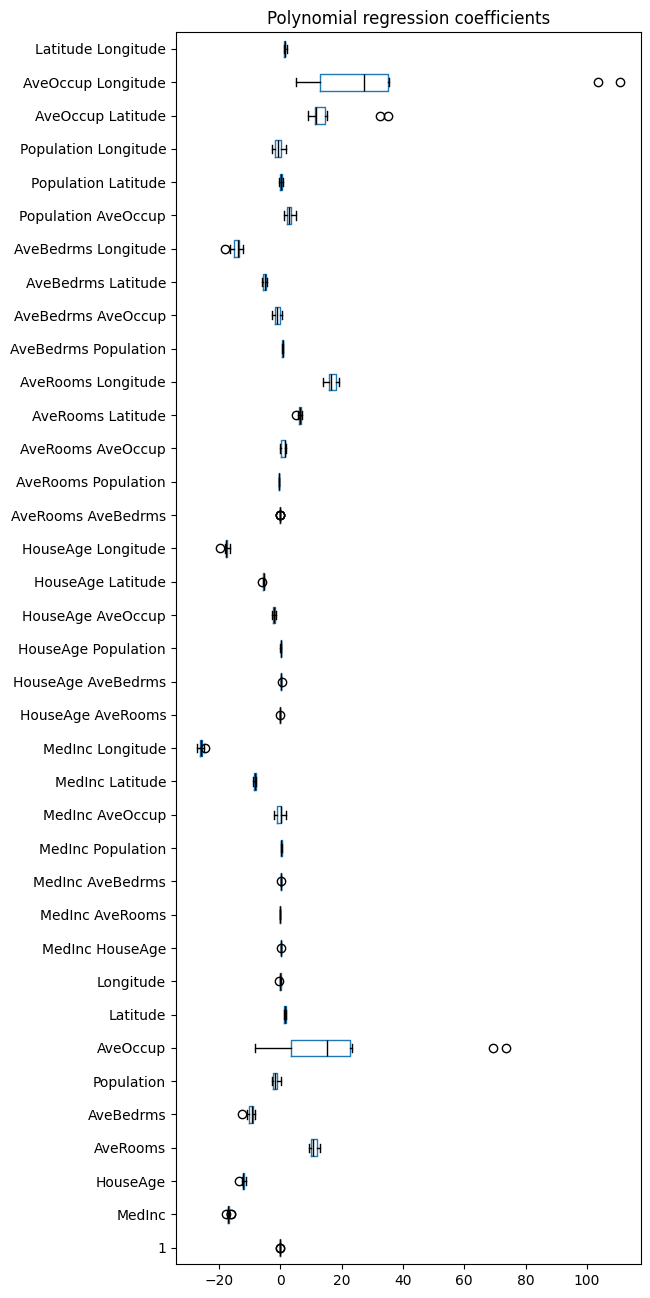

In [42]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Polynomial regression coefficients")

In [53]:
feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [54]:
coefs = [est[-1].coef_ for est in ridge_reg_cv_results["estimator"]]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

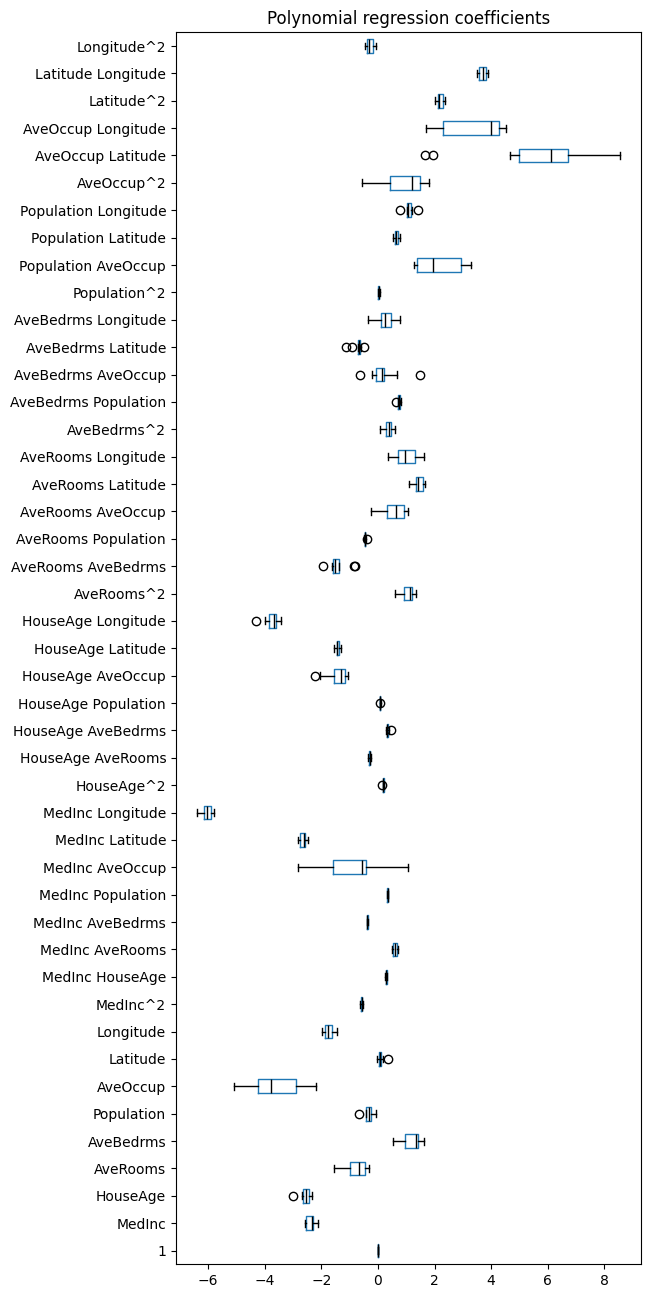

In [55]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Polynomial regression coefficients")

# Performance on Test Set

### Baseline

In [56]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)
mean_absolute_error(test_labels, baseline_model_median.predict(test_features))

0.8812669263565892

### Linear Regression with Normal Equation

In [57]:
mean_absolute_error(test_labels,lin_reg_cv_results['estimator'][0].predict(test_features))

0.5304369421957167

In [59]:
mean_absolute_error(test_labels, poly_sgd_random_search.best_estimator_.predict(test_features))

0.5293342167120857

### Polynomial Regression

In [60]:
poly_reg_pipeline.fit(com_train_features, com_train_labels)
mean_absolute_error(test_labels, poly_reg_pipeline.predict(test_features))

0.47838509820330166

### Ridge Regression

In [61]:
mean_absolute_error(test_labels, ridge_grid_search.best_estimator_.predict(test_features))

0.4646915540611353

# Summary
1. We trained multiple linear regression models on housing dataset. Set their hyperparamters through hyper-parameter optimization.
2. Retrained models with the best values of hyper-parameters and then evaluated their performance on the test data.
3. This is how most of the real world **problems are solved starting from simple models to more sophisticated models**.